In [1]:
from pathlib import Path
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
from typing import Tuple, Dict, List
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio

In [2]:
def getIMD() -> Tuple[pd.DataFrame, pd.DataFrame]:
    cwd = Path.cwd()
    parent = cwd.parent
    DLUHC_DIR= parent.joinpath("data/unzipped/DLUHC_open_data")
    imd2015path = DLUHC_DIR.joinpath('imd2015lsoa.csv')
    imd2019path = DLUHC_DIR.joinpath('imd2019lsoa.csv')
    imd2015DF = pd.read_csv(imd2015path)
    imd2019DF = pd.read_csv(imd2019path)
    return imd2015DF, imd2019DF
imd2015DF, imd2019DF = getIMD()

In [3]:
del imd2015DF["Units"]
del imd2015DF["DateCode"]

In [4]:
# imd2015DF.describe()

In [5]:
# imd2015DF.head()

In [6]:
# imd2015DF["Measurement"].unique()

In [7]:
# count = imd2015DF["FeatureCode"].value_counts()

In [8]:
def threeWaySplit(df:pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    scoreDF = df[df["Measurement"] == "Score"]
    rankDF = df[df["Measurement"] == "Rank"]
    decileDF = df[df["Measurement"] == "Decile"]
    return scoreDF, rankDF, decileDF

def makePreprocessedDf(df: pd.DataFrame) -> pd.DataFrame:
    return df.groupby(["Indices of Deprivation", "FeatureCode"])["Value"].first().unstack(fill_value=0)

def makeRow(preprocessed_df: pd.DataFrame, id: str, keys: List) -> Dict:
    return {index: preprocessed_df.loc[index, id] for index in keys}

def inputRow(target: pd.DataFrame, origin: pd.DataFrame) -> pd.DataFrame:
    preprocessed_df = makePreprocessedDf(origin)
    keys = preprocessed_df.index.values.tolist()
    for id in tqdm(origin["FeatureCode"].unique()):
        row = makeRow(preprocessed_df, id, keys)
        target.loc[id] = row
    return target

def preProcessing(origin: pd.DataFrame) -> pd.DataFrame:
    columns = np.concatenate((origin["Indices of Deprivation"].unique(), ["FeatureCode"]))
    iodByFeaturecode = pd.DataFrame(columns=columns)
    iodByFeaturecode.set_index("FeatureCode", inplace=True)
    iodByFeaturecode = inputRow(iodByFeaturecode, origin=origin)
    return iodByFeaturecode.reindex(sorted(iodByFeaturecode.columns), axis=1)

In [9]:
score15, rank15, decile15 = threeWaySplit(df=imd2015DF)

iodByFeatCode15score = preProcessing(origin=score15)
# iodByFeatCode15rank= preProcessing(origin=rank15)
# iodByFeatCode15decile= preProcessing(origin=decile15)

score19, rank19, decile19 = threeWaySplit(df = imd2019DF)

iodByFeatCode19score = preProcessing(origin=score19)
# iodByFeatCode19rank = preProcessing(origin=rank19)
# iodByFeatCode19decile = preProcessing(origin=decile19)

  0%|          | 0/32844 [00:00<?, ?it/s]

  0%|          | 0/32844 [00:00<?, ?it/s]

In [10]:
# fig = px.parallel_coordinates(iodByFeatCode15rank, width= 2000, height = 1000);
# fig.show()

In [11]:
# fig1 = px.parallel_coordinates(iodByFeatCode19rank, width=2000, height=1000)
# fig1.show()

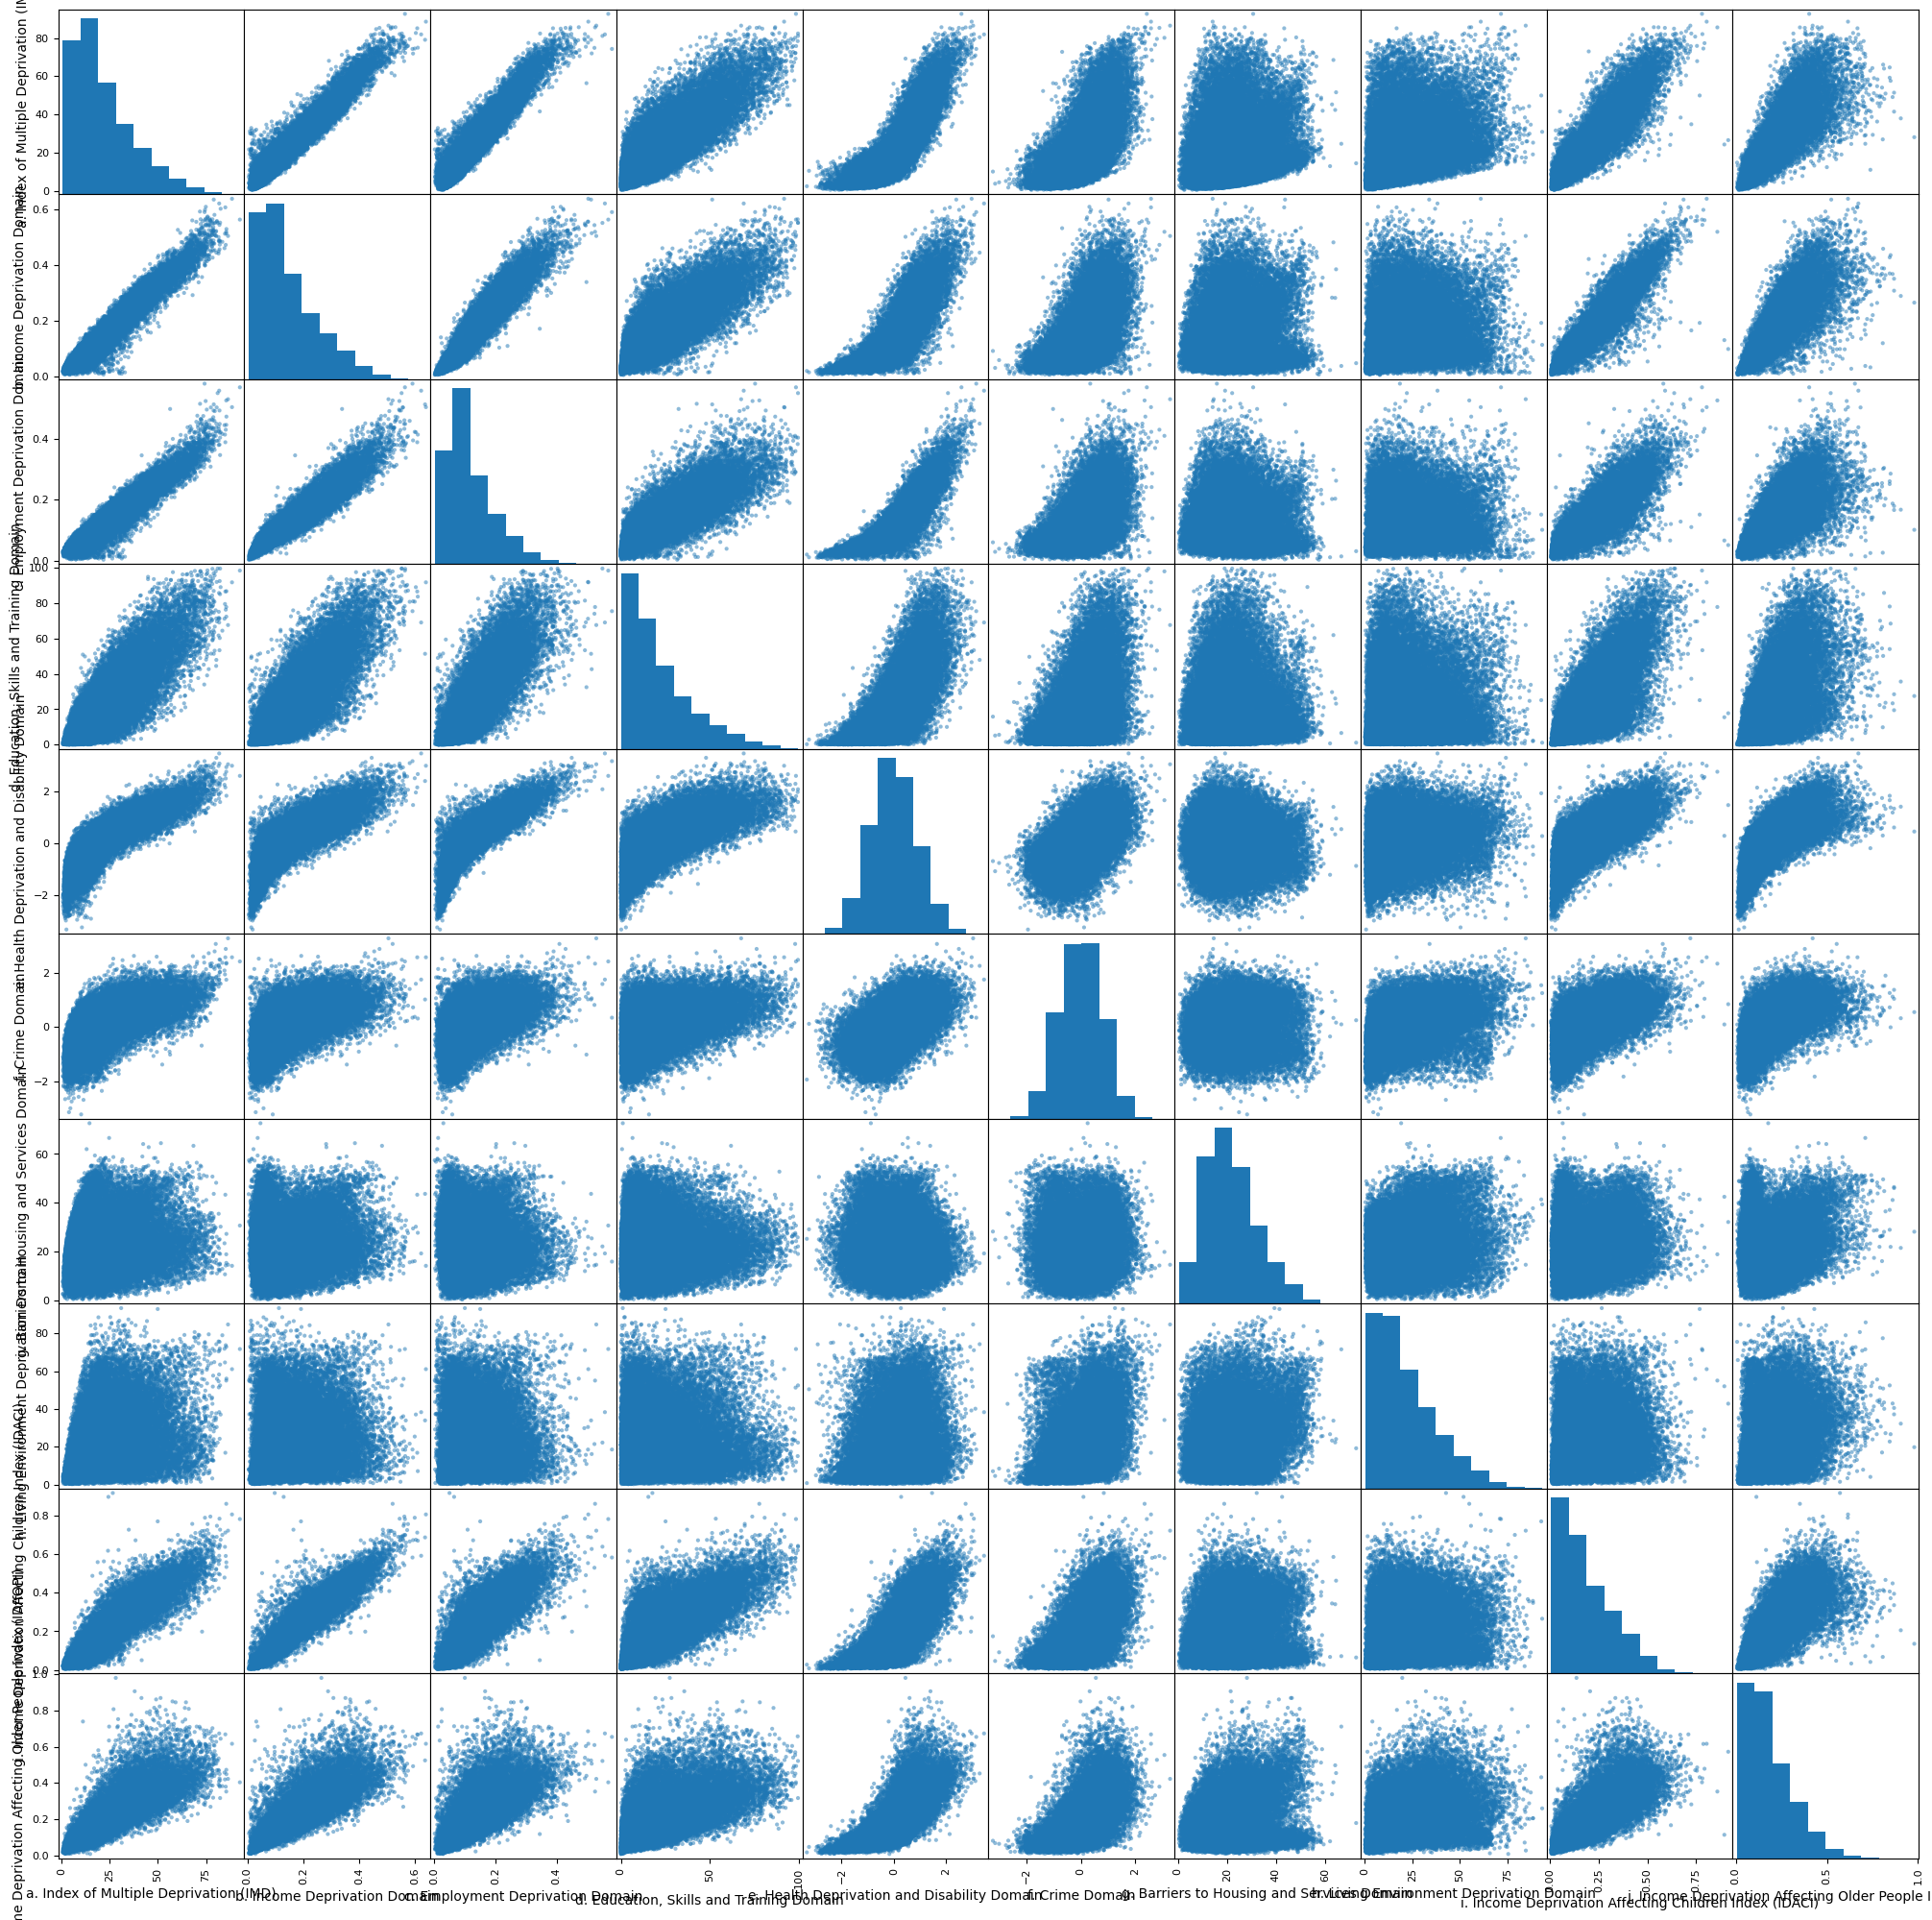

In [12]:
pd.plotting.scatter_matrix(iodByFeatCode15score, figsize=(25,25));
plt.savefig("score15splom.png")

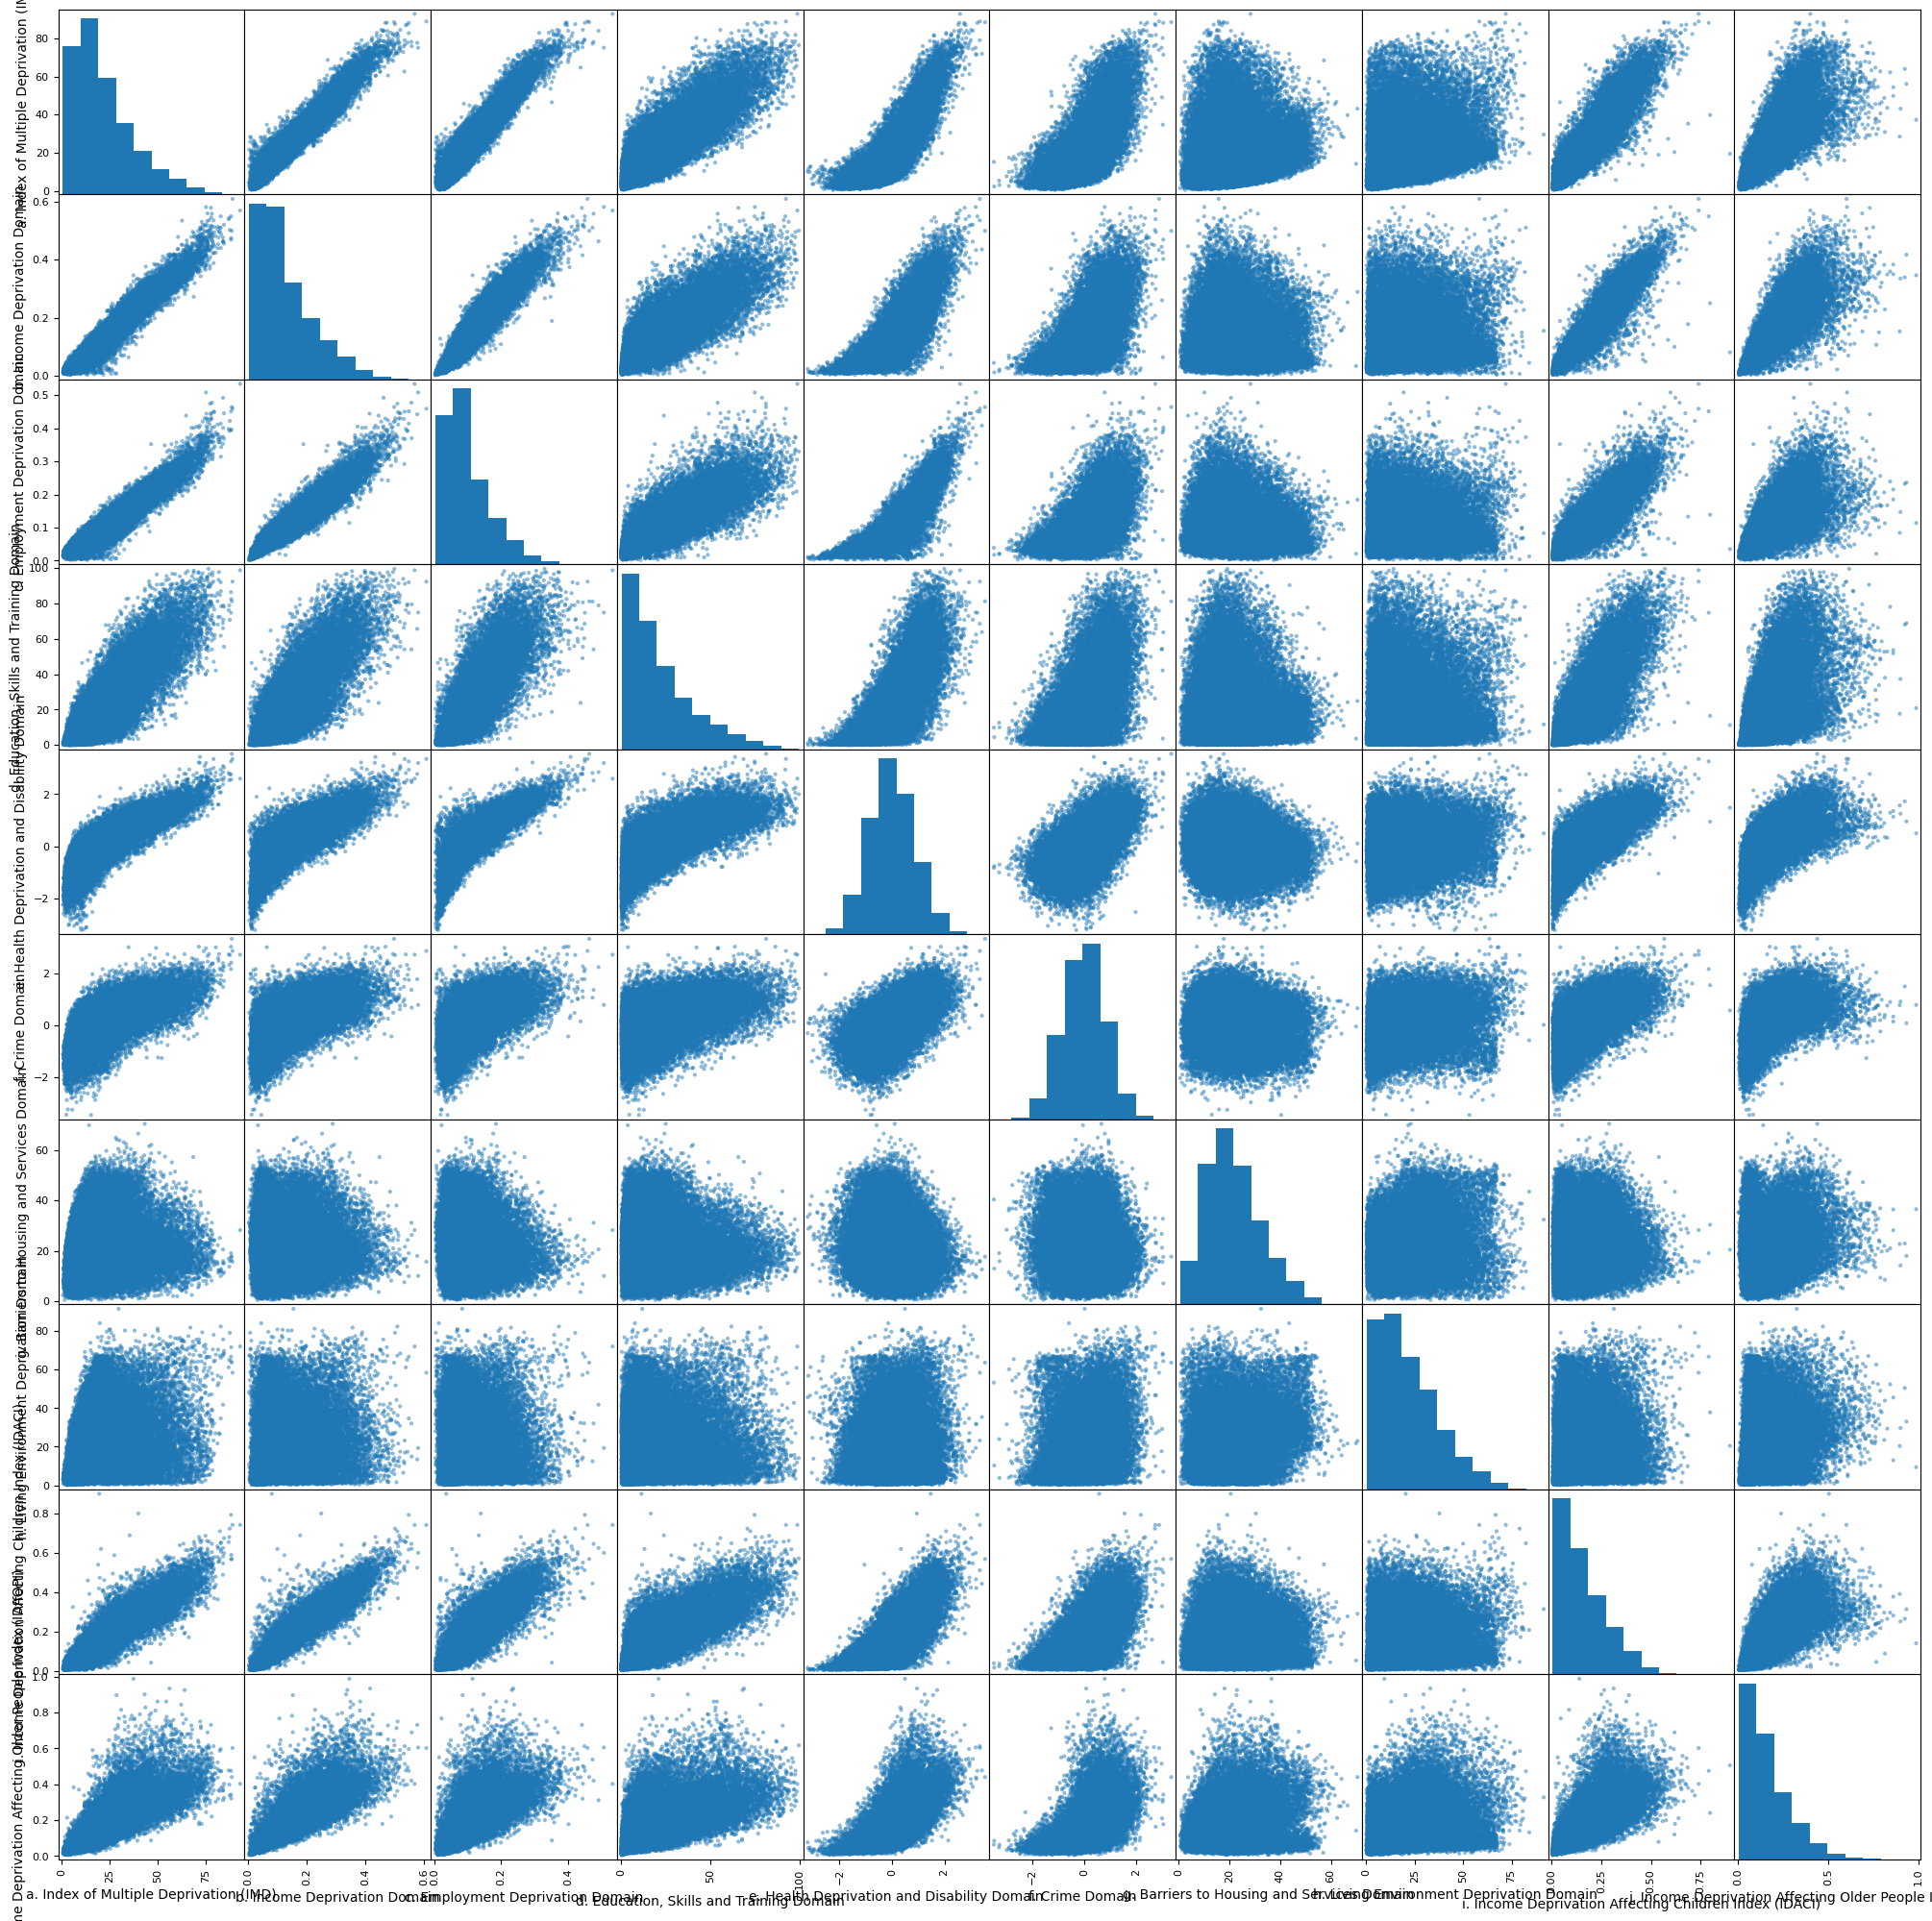

In [13]:
pd.plotting.scatter_matrix(iodByFeatCode19score, figsize=(25,25));
plt.savefig("score19splom.png")
